# Модуль matplotlib
Библиотека для визуализации данных.

Документация [здесь](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html).


Простой способ [реализовать график](https://matplotlib.org/stable/gallery/index.html). 

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.image as image

**figure** - рисунок.

**axes** - график.

На одном рисунке может быть расположено несколько графиков.

![title](img/matplot.png)

#### Отображение в отдельном окне

In [38]:
%matplotlib

Using matplotlib backend: Qt5Agg


#### Отображение в текущем окне

In [39]:
%matplotlib inline

Если не писать эти команды, то тогда придется вызывать метод show()

## Создание рисунка с графиками
matplotlib.pyplot.subplots(nrows=1, ncols=1, ... )

Документация [здесь](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html).

#### Один график на одном рисунке

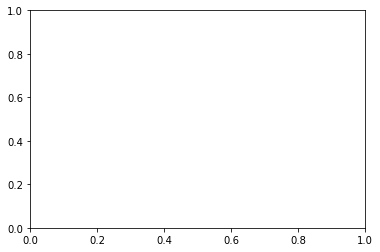

In [40]:
fig, ax = plt.subplots()

#### Четыре графика на одном рисунке

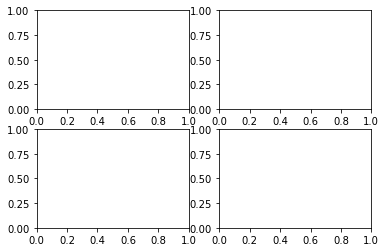

In [41]:
fig, ax = plt.subplots(2, 2)

In [42]:
print(ax)
print(type(ax))

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]
<class 'numpy.ndarray'>


#### Три графика на одном рисунке

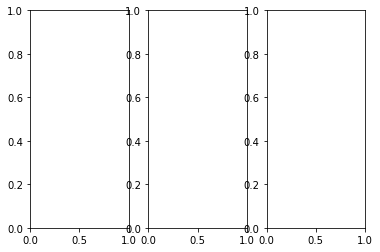

In [43]:
fig, ax = plt.subplots(1, 3)

#### Повторный вывод рисунка

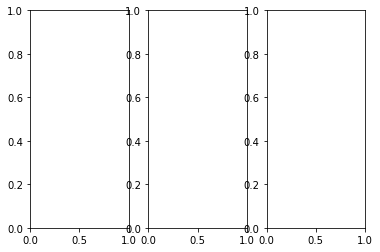

In [44]:
fig

## Создание графиков отдельно от рисунка
Документация [здесь](https://matplotlib.org/stable/api/figure_api.html).

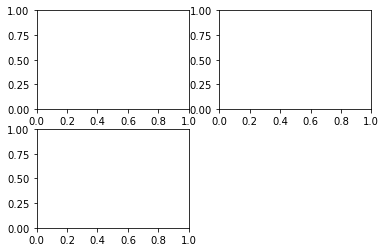

In [45]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

## Линейные графики

#### Один график на одном рисунке

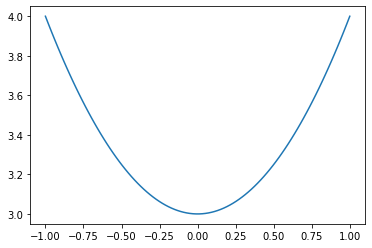

In [46]:
x = np.linspace(-1, 1, 100)
y = x * x + 3

fig, ax = plt.subplots()
ax.plot(x, y);

**Зачем** ";" ???

#### Два графика на одном рисунке

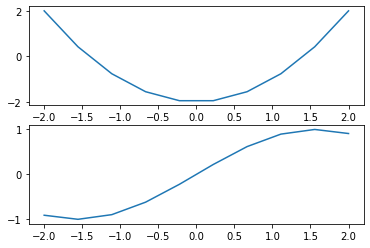

In [47]:
x = np.linspace(-2, 2, 10)
y1 = x * x - 2
y2 = np.sin(x)

fig, ax = plt.subplots(2, 1)
ax[0].plot(x, y1)
ax[1].plot(x, y2);

#### Добавление графиков на рисунок

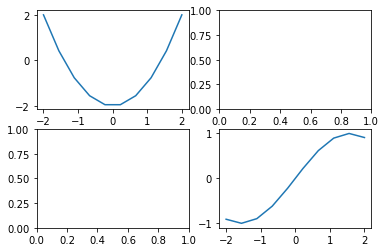

In [12]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].plot(x, y1)
ax[1, 1].plot(x, y2);

In [36]:
ax[0, 1].plot(x, y2 * x)
fig

TypeError: 'AxesSubplot' object is not subscriptable

#### Несколько функций на графике

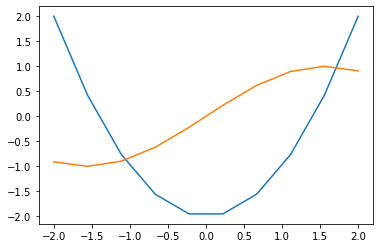

In [14]:
fig, ax = plt.subplots()
ax.plot(x, y1)
ax.plot(x, y2);

## Диаграммы рассеивания

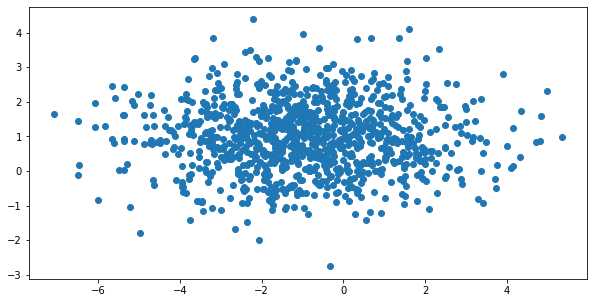

In [15]:
x = np.random.normal(-1, 2, 1000)
y = np.random.normal(1, 1, 1000)

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x, y);

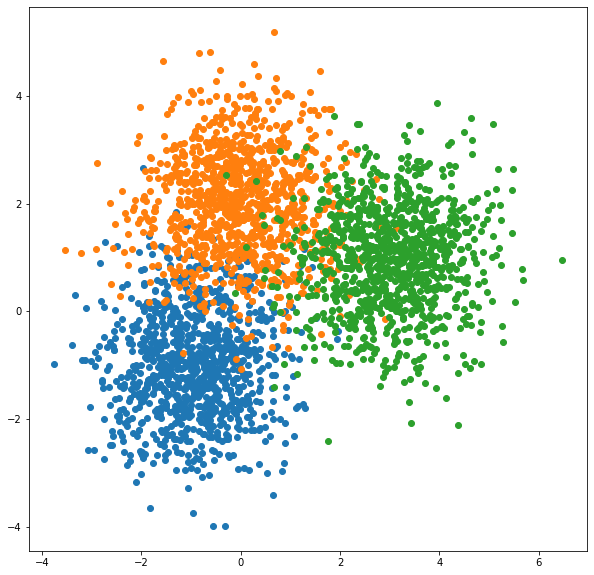

In [16]:
x1 = np.random.normal(-1, 1, 1000)
y1 = np.random.normal(-1, 1, 1000)
x2 = np.random.normal(-1, 1, 1000) + 1
y2 = np.random.normal(-1, 1, 1000) + 3
x3 = np.random.normal(-1, 1, 1000) + 4
y3 = np.random.normal(-1, 1, 1000) + 2

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x1, y1)
ax.scatter(x2, y2)
ax.scatter(x3, y3);

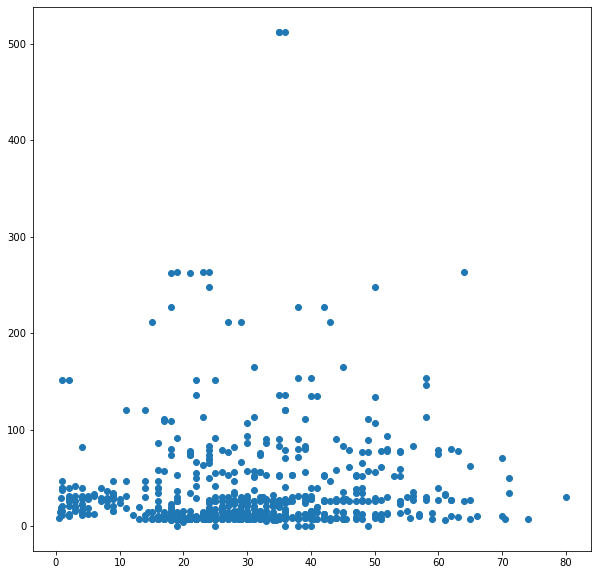

In [17]:
df = pd.read_csv('titanic.csv', sep=',', index_col='PassengerId')
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df['Age'], df['Fare']);

## Столбчатые диаграммы

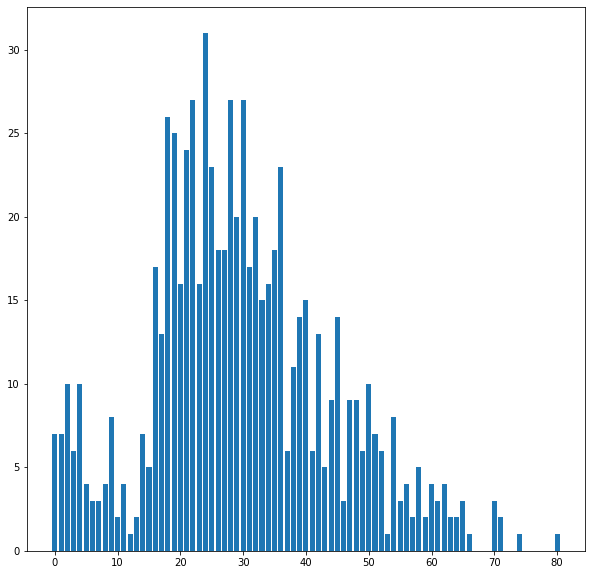

In [18]:
age = df['Age'].dropna().astype(int).value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(age.index, age);

## 3D графики

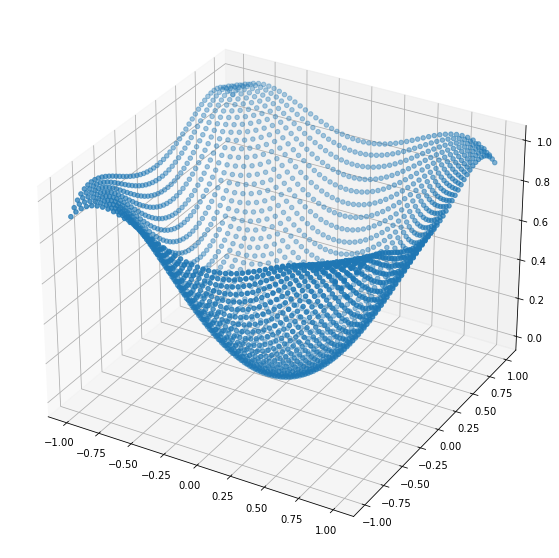

In [19]:
n = 50

grid_ticks = np.linspace(-1, 1, n)

x, y = np.meshgrid(grid_ticks, grid_ticks)
z = np.sin(x ** 2 + y ** 2)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter3D(x, y, z);

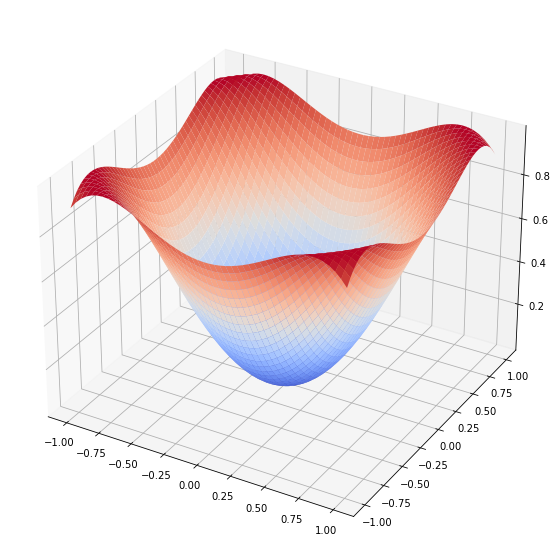

In [20]:
from mpl_toolkits.mplot3d import Axes3D

n = 50

grid_ticks = np.linspace(-1, 1, n)

x, y = np.meshgrid(grid_ticks, grid_ticks)
z = np.sin(x ** 2 + y ** 2)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x, y, z, cmap=cm.coolwarm);

## Круговые диаграммы

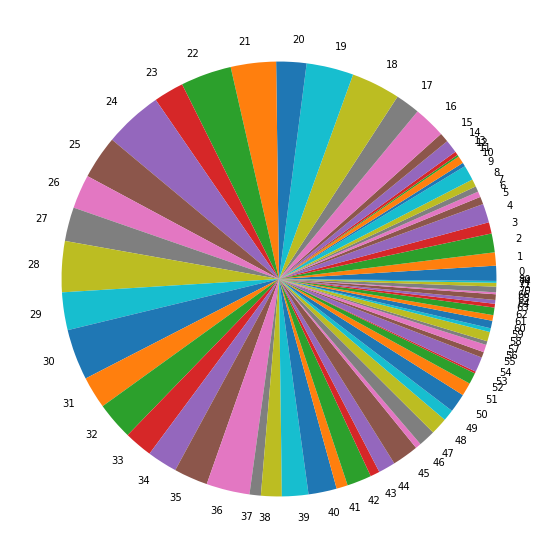

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(age, labels=age.index);

## Оформление графиков

In [22]:
x = np.linspace(-2.5, 2.5, 10)
y1 = x ** 2 - 2
y2 = np.sin(x)
y3 = y2 * x
y4 = x + 0.5
y5 = np.exp(x) / 3 - 1

### Заголовки

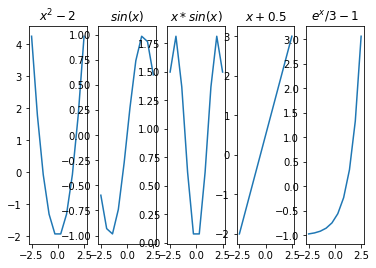

In [23]:
fig, ax = plt.subplots(1, 5)
ax[0].plot(x, y1)
ax[0].set_title("$x^2-2$")
ax[1].plot(x, y2)
ax[1].set_title("$sin(x)$")
ax[2].plot(x, y3)
ax[2].set_title("$x * sin(x)$");
ax[3].plot(x, y4)
ax[3].set_title("$x+0.5$")
ax[4].plot(x, y5)
ax[4].set_title("$e^x/3 - 1$");

### Линии

[Типы линий](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)

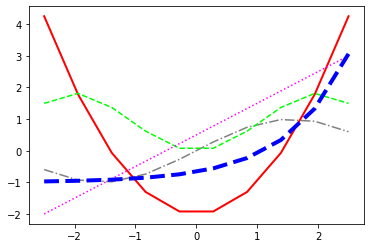

In [24]:
fig, ax = plt.subplots()
ax.plot(x, y1, color="red", linestyle="-", linewidth=2.0)
ax.plot(x, y2, color="0.5", linestyle="-.")
ax.plot(x, y3, color="#00FF00", linestyle="--")
ax.plot(x, y4, color=(1.0, 0.0, 1.0), linestyle=":")
ax.plot(x, y5, color="b", linestyle="dashed", linewidth=4.0);

### Маркеры

[Типы маркеров](https://matplotlib.org/stable/api/markers_api.html)

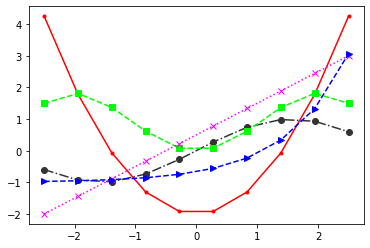

In [25]:
fig, ax = plt.subplots()
ax.plot(x, y1, color="red", linestyle="-", marker=".")
ax.plot(x, y2, color="0.2", linestyle="-.", marker="o")
ax.plot(x, y3, color="#00FF00", linestyle="--", marker="s")
ax.plot(x, y4, color=(1.0, 0.0, 1.0), linestyle=":", marker="x")
ax.plot(x, y5, color="b", linestyle="dashed", marker=">");

### Сетка

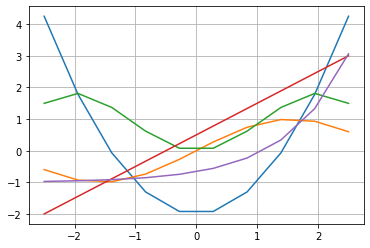

In [26]:
fig, ax = plt.subplots()
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
ax.plot(x, y4)
ax.plot(x, y5)
ax.grid()

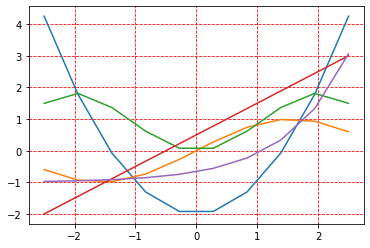

In [27]:
fig, ax = plt.subplots()
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
ax.plot(x, y4)
ax.plot(x, y5)
ax.grid(color="red", linestyle="--")

### Оси

#### Диапазоны

(-2.0, 2.0)

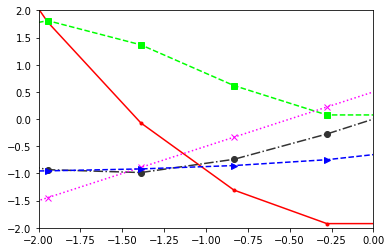

In [28]:
fig, ax = plt.subplots()
ax.plot(x, y1, color="red", linestyle="-", marker=".")
ax.plot(x, y2, color="0.2", linestyle="-.", marker="o")
ax.plot(x, y3, color="#00FF00", linestyle="--", marker="s")
ax.plot(x, y4, color=(1.0, 0.0, 1.0), linestyle=":", marker="x")
ax.plot(x, y5, color="b", linestyle="dashed", marker=">");

ax.set_xlim(-2, 0)
ax.set_ylim(-2, 2)

#### Подписи

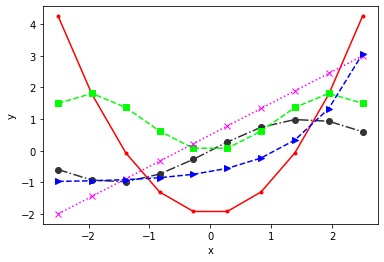

In [29]:
fig, ax = plt.subplots()
ax.plot(x, y1, color="red", linestyle="-", marker=".")
ax.plot(x, y2, color="0.2", linestyle="-.", marker="o")
ax.plot(x, y3, color="#00FF00", linestyle="--", marker="s")
ax.plot(x, y4, color=(1.0, 0.0, 1.0), linestyle=":", marker="x")
ax.plot(x, y5, color="b", linestyle="dashed", marker=">");

ax.set_xlabel("x")
ax.set_ylabel("y");

#### Отсчеты

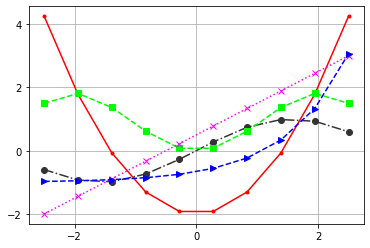

In [30]:
fig, ax = plt.subplots()
ax.plot(x, y1, color="red", linestyle="-", marker=".")
ax.plot(x, y2, color="0.2", linestyle="-.", marker="o")
ax.plot(x, y3, color="#00FF00", linestyle="--", marker="s")
ax.plot(x, y4, color=(1.0, 0.0, 1.0), linestyle=":", marker="x")
ax.plot(x, y5, color="b", linestyle="dashed", marker=">");

ax.set_xticks(np.arange(-2, 3, 2))
ax.set_yticks(np.arange(-2, 5, 2))
ax.grid()

### Легенда

[Местоположение и прочее](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)

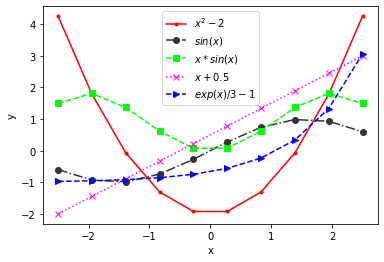

In [31]:
fig, ax = plt.subplots()
ax.plot(x, y1, color="red", linestyle="-", marker=".", label="$x^2-2$")
ax.plot(x, y2, color="0.2", linestyle="-.", marker="o", label="$sin(x)$")
ax.plot(x, y3, color="#00FF00", linestyle="--", marker="s", label="$x * sin(x)$")
ax.plot(x, y4, color=(1.0, 0.0, 1.0), linestyle=":", marker="x", label="$x+0.5$")
ax.plot(x, y5, color="b", linestyle="dashed", marker=">", label="$exp(x)/3 - 1$");

ax.set_xlabel("x")
ax.set_ylabel("y");
ax.legend(loc="upper center");

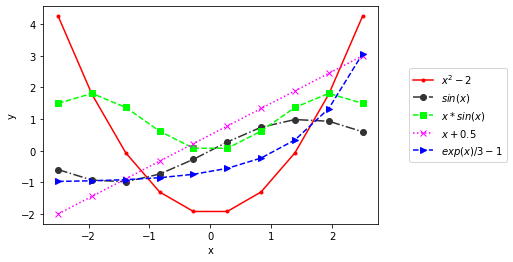

In [32]:
fig, ax = plt.subplots()
ax.plot(x, y1, color="red", linestyle="-", marker=".", label="$x^2-2$")
ax.plot(x, y2, color="0.2", linestyle="-.", marker="o", label="$sin(x)$")
ax.plot(x, y3, color="#00FF00", linestyle="--", marker="s", label="$x * sin(x)$")
ax.plot(x, y4, color=(1.0, 0.0, 1.0), linestyle=":", marker="x", label="$x+0.5$")
ax.plot(x, y5, color="b", linestyle="dashed", marker=">", label="$exp(x)/3 - 1$");

ax.set_xlabel("x")
ax.set_ylabel("y");
ax.legend(loc="center right", bbox_to_anchor=(1.4, 0.5));

In [33]:
#plt.xticks(rotation=90)

## Сохранение и загрузка

#### Сохранение

In [34]:
fig.savefig("./img/result.png")

image_format = 'svg'

fig.savefig("./img/result.svg", format=image_format, dpi=1200)

#### Загрузка и отображение

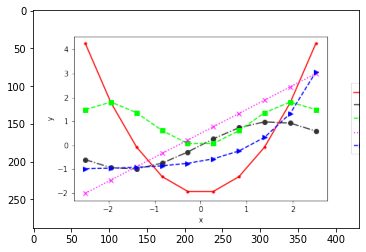

In [35]:
img = image.imread("./img/result.png")
plt.imshow(img);